1. 데이터베이스 수집 데이터 가져오기
2. 문서 셋 만들기(학습 데이터 7/10)
3. 가공(명사, 형태소)
4. LDA 모델
5. 테스트(테스트데이터 3/10)

In [1]:
# K-대푯값 군집 분석
import pandas as pd
from konlpy.tag import Hannanum
from sklearn.feature_extraction.text import CountVectorizer
from pyclustering.cluster import kmedoids
import numpy as np

### 1.  csv 데이터 불러오기, train과 test 데이터 나누기

In [18]:
hannanum = Hannanum()
news_data = pd.read_csv("C:/Users/330-15/Desktop/20_1_computer/SocialWebMining/Crawling/corona_mask_dust.csv"
                        , engine = 'python', encoding='utf-8')

In [3]:
train = news_data[:15]
test = news_data[15:] 

### 2. train_docs 명사 추출

In [4]:
train_docs = []
for i in train['내용']:
    train_docs.append(hannanum.nouns(i))
               
print(train_docs)
len(train_docs)

[['[아이뉴스24', '한수연', '기', '현대차증권', '29', '유한양행', '올해', '1분기', '코로나19', '여파', '실적', '역성장했지만,', '하반기', '레이저티닙', '얀센', '이중항체', '병용', '파이프라인', '단기', '모멘텀', '개선', '목표주가', '기존', '5만5천원', '6만원', '상향', '투자의견', '매수', '유', '유한양행', '올해', '1분기', '매출액', '전년', '동기', '대비', '9', '감소', '3천133억원', '영업이익', '82', '급감한', '11억원', '기록', '박병국', '현대차증권', '애널리스트', '"코로나19', '1분기', '연결기준', '매출액', '전년', '동기', '9', '영업이익', '82', '급감했다"면서', '하반기', '개시', '가능성', '레이저티닙', '얀센', '이중항체', '병용', '디자인', '주목', '박', '애널리스트는', '13일', '공개', '초록', '데이터', '레이저티닙', '3세대', '가능성', '번', '확인했다"며', '공개', '데이터', 'T790M', '변이', '환자', '2차', '치료제', '목적', '투약', '레이저티닙', '240mg', '변', '비소세포폐암', '시장', '주도하', '타그리소(80mg)', '2상', '유사한', '데이터', '단독', '가능성', '설명', '이', '이달', '포스터', '공개', '가능성', '160mg,', '240mg', '용량', '데이터', '주목', '1차', '치료제', '목적', '글로벌', '3상', '단독', '요법', '160mg,', '240mg', '임상', '진행', '있다"며', '임상', '독성시험', '완료', '25724', '임상개시', '시점', '하반기', '가능성', '그', '1000', '규모', '마일스톤', '수령', '수', '한수연기', 'papyrus@inews24', 'com▶네이버', '채

15

### 2. test_docs 명사 추출

In [5]:
test_docs = []
for i in test['내용']:
    test_docs.append(hannanum.nouns(i))
               
print(test_docs)
len(test_docs)

[['유화', '유가반등', '마진', '제한적2차', '전지·태양광', '집중', '전략', '필요삼성·애플,', '가을', '신제품', '출시휴대폰', '부품株', '저가매수', '만', '코로나19', '경제활동', '봉쇄지역', '정상화', '글로벌', '증시', '상승세', '미·중', '등', '고개', '증시', '부담', '6월', '증시', '파생상품', '시장', '수급', '선물옵션', '만기일', '추', '상승', '후', '6월', '전강후약', '예상', '종목별', '증시', '주도하', '네이버,', '카카오', '등', '언택트', '관련주', '삼성SDI,', '화학', '등', '2차전지', '관련주', '삼성바이오로직스,', '셀트리온', '3형제', '등', '바이오시밀러', '등', '기존', '주도주', '가격', '부담', '자동차', '정유화학', '금융', '등', '낙폭과대', '경기민감', '업종', '대표주로', '순환매', '유입', '주목', '만', '◆', '은행코로나19', '사태', '경기', '침체', '여파', '2분기부터', '본격적', '반영', '전망', '투자지표상', '10년래', '최저', '주가순자산비율(PBR),', '주가이익비율(PER)', '기록', '점', '악재', '요인', '반영', '것', '◆', '자동차마지막', '글로벌', '셧', '공장', '기아차', '멕시코', '공장', '26일', '생산', '재개', '현대·기아차', '해외', '공장', '정상화', '1분기', '이', '2분기', '어닝쇼크', '불가피', '상황', '완성차', '업체들', '주가', '이', '선반영하', '만큼', '하반기', '기저효과', '감안', '주', '턴어라운드', '수', '◆', '면세점2020년', '4월', '면세점', '실적', '코로나19', '영향', '부진', '4월', '면세점', '매출액', '전년', '동월', '대비', '54', '역성장했고,

4

In [6]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim
from nltk.tokenize import RegexpTokenizer

### 3. train_dictionary 

In [21]:
train_dictionary = corpora.Dictionary(train_docs)
print(dict(list(train_dictionary.token2id.items())[0:15]))

{'"코로나19': 0, "'아이뉴스24'": 1, '1000': 2, '11억원': 3, '13일': 4, '160mg,': 5, '1분기': 6, '1차': 7, '240mg': 8, '25724': 9, '29': 10, '2상': 11, '2차': 12, '3상': 13, '3세대': 14}


### 3. test_dicitonary

In [25]:
test_dictionary = corpora.Dictionary(test_docs)
print(dict(list(test_dictionary.token2id.items())[0:15]))

{'&': 0, "'매콤달콤'": 1, '-100': 2, '-90': 3, '10년': 4, '10년래': 5, '1분기': 6, '1인당': 7, '26일': 8, '2분기': 9, '2분기부터': 10, '2차전지': 11, '3분기': 12, '3사': 13, '3형제': 14}


### 4. train_corpus 

In [32]:
train_corpus = [train_dictionary.doc2bow(train_doc) for train_doc in train_docs]
train_corpus[:3]

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 2),
  (6, 3),
  (7, 1),
  (8, 3),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 2),
  (19, 2),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 5),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 3),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 2),
  (43, 1),
  (44, 4),
  (45, 1),
  (46, 2),
  (47, 1),
  (48, 4),
  (49, 1),
  (50, 1),
  (51, 2),
  (52, 1),
  (53, 2),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 2),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 2),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 2),
  (81, 2),
  (82, 1),
  (83, 1),
  (84, 1),
  (85, 1),
  (86, 1),
  (87, 2),
  (88, 1),
  (89, 1),
  (90, 2),
  (91, 2)

### 4. test_corpus 

In [33]:
test_corpus = [test_dictionary.doc2bow(test_doc) for test_doc in test_docs]
test_corpus[:3]

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 2),
  (10, 1),
  (11, 2),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 3),
  (16, 1),
  (17, 3),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 8),
  (23, 3),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 3),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 3),
  (43, 1),
  (44, 1),
  (45, 2),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 2),
  (53, 1),
  (54, 2),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 2),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 4),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 9),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 2),
  (76, 3),
  (77, 1),
  (78, 3),
  (79, 2),
  (80, 2),
  (81, 1),
  (82, 2),
  (83, 1),
  (84, 1),
  (85, 3),
  (86, 1),
  (87, 1),
  (88, 1),
  (89, 1),
  (90, 1),
  (91, 1)

### 5. train_corpus , train_dicitonary 를 이용한 ldamodel

In [39]:
train_ldamodel = gensim.models.ldamodel.LdaModel(train_corpus,
                                           num_topics=3,
                                           id2word=train_dictionary)

# 토픽별 단어들 출력(토픽별 출력단어들 개수: 5개)
# 단어 옆의 숫자는 가중치(각 토픽에서 해당 단어가 설명하는 비중) 의미
train_ldamodel.print_topics(num_words=5)

[(0, '0.009*"등" + 0.008*"것" + 0.007*"수" + 0.007*"라돈" + 0.007*"방사선"'),
 (1, '0.008*"등" + 0.007*"수" + 0.007*"것" + 0.006*"뇌질환" + 0.006*"유한양행"'),
 (2, '0.008*"등" + 0.006*"것" + 0.006*"수" + 0.006*"뇌질환" + 0.005*"유한양행"')]

### 5. test_corpus , test_dicitonary 를 이용한 ldamodel

In [40]:
test_ldamodel = gensim.models.ldamodel.LdaModel(test_corpus,
                                           num_topics=3,
                                           id2word=test_dictionary)

# 토픽별 단어들 출력(토픽별 출력단어들 개수: 5개)
# 단어 옆의 숫자는 가중치(각 토픽에서 해당 단어가 설명하는 비중) 의미
test_ldamodel.print_topics(num_words=5)

[(0, '0.011*"등" + 0.009*"삼성" + 0.009*"수" + 0.008*"◆" + 0.008*"랩"'),
 (1, '0.018*"스타트업" + 0.014*"랩" + 0.013*"기" + 0.013*"수" + 0.011*"삼성전자"'),
 (2, '0.013*"스타트업" + 0.011*"등" + 0.009*"삼성전자" + 0.008*"수" + 0.008*"랩"')]

### 6. train_ldamodel Perplexity, Coherence Score 구하기

In [43]:
from gensim.models import CoherenceModel
print("\nPerplexity : ", train_ldamodel.log_perplexity(train_corpus))
# toppn : 상위 N  개의 단어를 이용해서 유사도를 계산하라는 의미
train_coherence_model_lda = CoherenceModel(model=train_ldamodel,
                                     texts=train_docs,
                                     dictionary=train_dictionary,
                                     topn=10)
train_coherence_lda = train_coherence_model_lda.get_coherence()
print("\nCoherence Score : ", train_coherence_lda)


Perplexity :  -7.450135301359442

Coherence Score :  0.30107079362042427


### 6. test_ldamodel Perplexity, Coherence Score 구하기

In [45]:
from gensim.models import CoherenceModel
print("\nPerplexity : ", test_ldamodel.log_perplexity(test_corpus))
# toppn : 상위 N  개의 단어를 이용해서 유사도를 계산하라는 의미
test_coherence_model_lda = CoherenceModel(model=test_ldamodel,
                                     texts=test_docs,
                                     dictionary=test_dictionary,
                                     topn=10)
test_coherence_lda = test_coherence_model_lda.get_coherence()
print("\nCoherence Score : ", test_coherence_lda)


Perplexity :  -6.960148669824639

Coherence Score :  0.4288333959052914


### 7. train_ldamodel perplexity 지표 변화

In [48]:
import matplotlib.pyplot as plt

# 토픽의 개수를 달리하며 perplexity 지표 변화를 보여줌

train_perplexity_values = []
for i in range(2, 10):
    train_ldamodel = gensim.models.ldamodel.LdaModel(train_corpus,
                                               num_topics=i,
                                              id2word=train_dictionary)
    train_perplexity_values.append(train_ldamodel.log_perplexity(train_corpus))

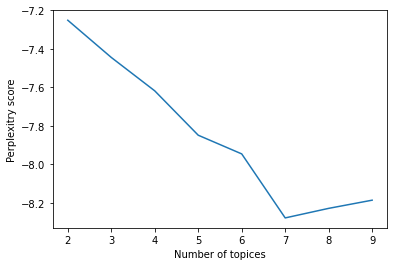

In [49]:
x = range(2, 10)
plt.plot(x, train_perplexity_values)
plt.xlabel("Number of topices")
plt.ylabel("Perplexitry score")
plt.show()

### 7. test_ldamodel perplexity 지표 변화

In [50]:
import matplotlib.pyplot as plt

# 토픽의 개수를 달리하며 perplexity 지표 변화를 보여줌
test_perplexity_values = []

for i in range(2, 10):
    test_ldamodel = gensim.models.ldamodel.LdaModel(test_corpus,
                                               num_topics=i,
                                              id2word=test_dictionary)
    perplexity_values.append(test_ldamodel.log_perplexity(test_corpus))

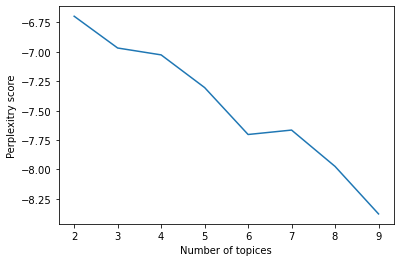

In [51]:
x = range(2, 10)
plt.plot(x, test_perplexity_values)
plt.xlabel("Number of topices")
plt.ylabel("Perplexitry score")
plt.show()

### 8. train data =>  topic coherence 지표 변화를 보여줌

In [52]:
# 토픽의 개수를 달리하며 topic coherence 지표 변화를 보여줌
train_coherence_values = []

for i in range(2, 10):
    train_ldamodel = gensim.models.ldamodel.LdaModel(train_corpus,
                                               num_topics=i,
                                               id2word=train_dictionary)
    train_coherence_model_lda = CoherenceModel(model=train_ldamodel,
                                         texts=train_docs,
                                         dictionary=train_dictionary,
                                         topn=10)
    train_coherence_lda = train_coherence_model_lda.get_coherence()
    train_coherence_values.append(train_coherence_lda)

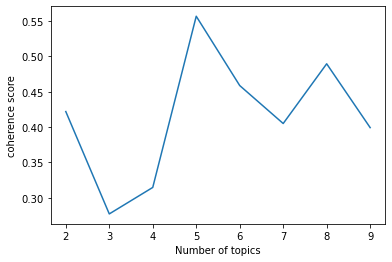

In [54]:
x = range(2, 10)
plt.plot(x, train_coherence_values)
plt.xlabel('Number of topics')
plt.ylabel('coherence score')
plt.show()

### 8. test data =>  topic coherence 지표 변화를 보여줌

In [57]:
# 토픽의 개수를 달리하며 topic coherence 지표 변화를 보여줌
test_coherence_values = []

for i in range(2, 10):
    test_ldamodel = gensim.models.ldamodel.LdaModel(test_corpus,
                                               num_topics=i,
                                               id2word=test_dictionary)
    test_coherence_model_lda = CoherenceModel(model=test_ldamodel,
                                         texts=test_docs,
                                         dictionary=test_dictionary,
                                         topn=10)
    test_coherence_lda = test_coherence_model_lda.get_coherence()
    test_coherence_values.append(test_coherence_lda)

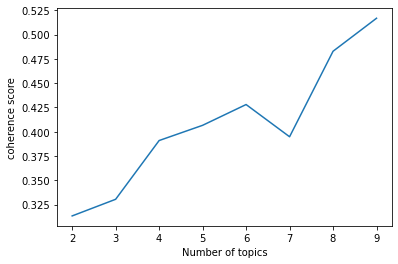

In [58]:
x = range(2, 10)
plt.plot(x, test_coherence_values)
plt.xlabel('Number of topics')
plt.ylabel('coherence score')
plt.show()